![](itd2.png)
 
    
**Inteligencia Artificial:**
**Visualizacion de datos**

**Nombre del docente:**
**Jose Gabriel Rodriguez Rivas**

**Nombre del alumno:**
**Vergara Hernandez Jesus Alejandro**

**Situación/Contexto
En esta práctica de laboratorio, aprenderá cómo combinar base de datos SQLite, archivos JSON y estructuras de datos de  pandas. Usted contará con una interfaz con un wrapper para la biblioteca folium que le permite graficar datos en un mapa geográfico. Se generará un mapa del Reino Unido dividido en áreas, cada una de color de sombreado que es proporcional a la velocidad de Internet, una interesante forma de comprender los datos. Con este mapa, estará claro cómo varía la velocidad de Internet a largo de Inglaterra. Aprenderá cómo encontrar y solucionar problemas con los datos.**

**Parte 1: Preparar los datos**

**Paso 1: Obtener datos y guardarlos en un marco de datos pandas.**

**a) Importe las bibliotecas.**

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import folium
%matplotlib inline

**b) Conéctese a la base de datos.**

In [2]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

**c) Guarde los datos en un marco de datos.**

In [4]:
query = 'SELECT * from velocidad_promedio'
df = pd.read_sql(query, conn)
df.head()

,index,Area,Ping_promedio,Descarga_promedio,Subida_promedio
0,0,E07000097,52.566643,21.337226,8.495186
1,1,E07000140,51.647585,20.921209,8.349087
2,2,E07000146,52.580343,21.491920,8.535480
3,3,E06000008,52.433086,21.556528,8.568044
4,4,E07000028,52.276472,20.987441,8.375227


**Paso 2: Limpieza de datos**

**a) Explore los datos.**

In [5]:
df.drop('index', inplace=True, axis=1)
df.shape

(326, 4)

**b) Limpie los datos**

In [6]:
df.head()

,Area,Ping_promedio,Descarga_promedio,Subida_promedio
0,E07000097,52.566643,21.337226,8.495186
1,E07000140,51.647585,20.921209,8.349087
2,E07000146,52.580343,21.491920,8.535480
3,E06000008,52.433086,21.556528,8.568044
4,E07000028,52.276472,20.987441,8.375227


**Paso 3: Familiarizarse con los archivos JSON.**

In [8]:
la_json = pd.read_json('LA_poligons.json')
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


**Paso 4: Calcular un promedio de velocidad de ping**

In [9]:
df_promedio = df[['Area', 'Ping_promedio']]
df_promedio = df_promedio.rename(columns = {'Area':'LA_code'})
df_promedio.head()

,LA_code,Ping_promedio
0,E07000097,52.566643
1,E07000140,51.647585
2,E07000146,52.580343
3,E06000008,52.433086
4,E07000028,52.276472


**a) Explique los datos.**

In [10]:
print(df_promedio.Ping_promedio.min())
print(df_promedio.Ping_promedio.max())

0.0
70.19295547285596


In [11]:
bins = np.arange(df_promedio.Ping_promedio.min(), df_promedio.Ping_promedio.max(), 
                 (df_promedio.Ping_promedio.max()-df_promedio.Ping_promedio.min()) /6)
bins = list(bins)
print(bins)

[0.0, 11.69882591214266, 23.39765182428532, 35.09647773642798, 46.79530364857064, 58.4941295607133]


**Parte 2: Visualizar los datos**

In [16]:
import folium.plugins
mymap = folium.plugins.folium_top_x_preds_mapper(df_promedio, la_json,
                                               'LA_code',
                                              'Ping_promedio',
                                              bins)

AttributeError: module 'folium.plugins' has no attribute 'folium_top_x_preds_mapper'

*En esta parte teniamos folium_utils me puse a investigar a ver si con .plugins funcionaba pero no*

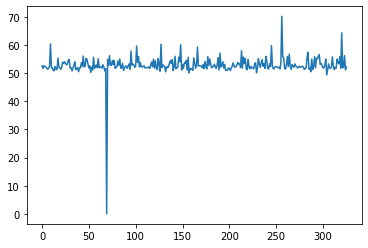

In [17]:
df_promedio.Ping_promedio.plot()

In [18]:
#Verificar datos que lleven el valor 0 
df_promedio[df_promedio.Ping_promedio==0]

,LA_code,Ping_promedio
69,DateTime,0.0


In [20]:
#Eliminar datos que lleven 0
df_promedio.drop(60,inplace=True)


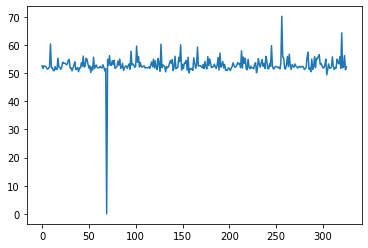

In [21]:
df_promedio.Ping_promedio.plot()